In [1]:
quadrante_numbers = [3] # 0 to 3
fish_identification = [1] # 1 to 2
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv("C:/Users/marcio/Documents/results_Ian/20191121_1454_iCab_L_C.avi.csv")

df = df.set_index(['frame_number'])

df["take"] = None
#the_second=False

In [2]:
#df = df.loc[(df["fish_id"] != "X") & (df["fish_id"] != "Y")]

import ast
df['fish_head'] = df['fish_head'].apply(ast.literal_eval)
df['fish_tail'] = df['fish_tail'].apply(ast.literal_eval)
#df['fish_id'] = df['fish_id'].apply(ast.literal_eval)
df['tail_points'] = df['tail_points'].apply(ast.literal_eval)
df['quad_coord'] = df['quad_coord'].apply(ast.literal_eval)

In [3]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1201,21.023796,"(127, 669)","(170, 653)","(108, 678)",0,619.5,X,"[(676, 113), (669, 127), (663, 141), (658, 155...","(0, 430, 414, 440)",None
1201,18.248288,"(210, 532)","(248, 532)","(192, 529)",0,405.0,Y,"[(531, 204), (534, 215), (534, 226), (533, 237...","(0, 430, 414, 440)",None
1201,13.601471,"(598, 546)","(616, 520)","(590, 557)",1,323.5,X,"[(552, 594), (544, 599), (536, 605), (528, 610...","(440, 426, 408, 444)",None
1201,15.811388,"(450, 526)","(483, 546)","(437, 517)",1,335.0,Y,"[(521, 443), (528, 453), (533, 463), (539, 473...","(440, 426, 408, 444)",None
1201,11.401754,"(636, 95)","(630, 71)","(639, 106)",2,270.0,X,"[(99, 637), (92, 635), (85, 634), (78, 632), (...","(440, 0, 408, 403)",None
...,...,...,...,...,...,...,...,...,...,...
2502,22.022716,"(347, 563)","(349, 610)","(346, 541)",0,604.5,1,"[(554, 347), (568, 349), (582, 349), (596, 349...","(0, 430, 414, 440)",None
2502,12.206556,"(203, 399)","(229, 381)","(193, 406)",3,266.0,1,"[(400, 201), (397, 208), (391, 215), (386, 222...","(0, 0, 416, 409)",None
2502,16.492423,"(300, 216)","(264, 220)","(316, 212)",3,356.5,2,"[(213, 311), (216, 300), (219, 288), (221, 276...","(0, 0, 416, 409)",None


In [4]:
set_number = 1
for quadrant in quadrante_numbers:    
    for fish_ident in fish_identification:        
        list_frames = list(df[(df["quadrant"] == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")) ].index.unique())
        for idx, value in enumerate(list_frames):
            if idx > 0:
                the_value = df.loc[(df.index==value) & (df.quadrant == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")), 'fish_id'].iloc[0]
                previous_value = df.loc[(df.index==list_frames[idx-1]) & (df.quadrant == quadrant) & ((df["fish_id"] == str(fish_ident)) | (df["fish_id"] == "X") | (df["fish_id"] == "Y")), 'fish_id'].iloc[0]
                if the_value.isnumeric() and previous_value.isnumeric():
                    df.loc[(df.index==value) & (df.quadrant == quadrant) & (df["fish_id"] == str(fish_ident)), "take"] = set_number
                    
                elif not the_value.isnumeric() and (previous_value.isnumeric()):
                    set_number+=1
                            
                elif the_value.isnumeric() and not (previous_value.isnumeric()):
                    df.loc[(df.index==value) & (df.quadrant == quadrant) & (df["fish_id"] == str(fish_ident)), "take"] = set_number
                

In [5]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1201,21.023796,"(127, 669)","(170, 653)","(108, 678)",0,619.5,X,"[(676, 113), (669, 127), (663, 141), (658, 155...","(0, 430, 414, 440)",None
1201,18.248288,"(210, 532)","(248, 532)","(192, 529)",0,405.0,Y,"[(531, 204), (534, 215), (534, 226), (533, 237...","(0, 430, 414, 440)",None
1201,13.601471,"(598, 546)","(616, 520)","(590, 557)",1,323.5,X,"[(552, 594), (544, 599), (536, 605), (528, 610...","(440, 426, 408, 444)",None
1201,15.811388,"(450, 526)","(483, 546)","(437, 517)",1,335.0,Y,"[(521, 443), (528, 453), (533, 463), (539, 473...","(440, 426, 408, 444)",None
1201,11.401754,"(636, 95)","(630, 71)","(639, 106)",2,270.0,X,"[(99, 637), (92, 635), (85, 634), (78, 632), (...","(440, 0, 408, 403)",None
...,...,...,...,...,...,...,...,...,...,...
2502,22.022716,"(347, 563)","(349, 610)","(346, 541)",0,604.5,1,"[(554, 347), (568, 349), (582, 349), (596, 349...","(0, 430, 414, 440)",None
2502,12.206556,"(203, 399)","(229, 381)","(193, 406)",3,266.0,1,"[(400, 201), (397, 208), (391, 215), (386, 222...","(0, 0, 416, 409)",2
2502,16.492423,"(300, 216)","(264, 220)","(316, 212)",3,356.5,2,"[(213, 311), (216, 300), (219, 288), (221, 276...","(0, 0, 416, 409)",None


In [6]:
df_filtered = df[(df['take'].notnull())]
#df['fish_id'] = df['fish_id'].apply(ast.literal_eval)
df_filtered['fish_id'] = df_filtered['fish_id'].apply(lambda x: int(x)) 



In [7]:
df_filtered

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take
frame_number,,,,,,,,,,
1307,12.000000,"(82, 49)","(54, 50)","(94, 49)",3,256.0,1,"[(49, 86), (50, 78), (50, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1
1308,13.038405,"(82, 49)","(54, 50)","(95, 48)",3,256.0,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1
1309,13.038405,"(83, 48)","(54, 50)","(96, 47)",3,252.5,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1
1310,12.000000,"(84, 48)","(57, 49)","(96, 48)",3,240.5,1,"[(48, 89), (49, 81), (49, 73), (48, 65), (49, ...","(0, 0, 416, 409)",1
1311,12.041595,"(85, 48)","(57, 48)","(97, 47)",3,250.5,1,"[(48, 89), (49, 81), (48, 73), (48, 65), (48, ...","(0, 0, 416, 409)",1
...,...,...,...,...,...,...,...,...,...,...
2498,13.453624,"(208, 397)","(227, 371)","(199, 407)",3,272.5,1,"[(402, 204), (395, 212), (387, 219), (379, 224...","(0, 0, 416, 409)",2
2499,13.601471,"(207, 397)","(228, 376)","(196, 405)",3,268.5,1,"[(403, 200), (397, 208), (390, 216), (384, 224...","(0, 0, 416, 409)",2
2500,12.041595,"(205, 398)","(226, 382)","(196, 406)",3,267.0,1,"[(402, 200), (397, 207), (392, 214), (387, 221...","(0, 0, 416, 409)",2


In [8]:
df_filtered["angle"] = np.NAN


In [9]:
df_filtered["angle"] = df_filtered.apply(lambda x: (x.fish_head, x.tail_points[1]), axis=1)


In [10]:
df_filtered["rotation"] = np.NAN

In [11]:
import math

def calc_rotation(angle):
    x = angle[0][0] - angle[1][1]   #must invert, as squeleton points is y,x
    
    y = angle[0][1] - angle[1][0]   #must invert, as squeleton points is y,x
   
    dual_degree = math.atan2(y*-1, x) * 180 / np.pi
    
                  
      
    

    return dual_degree


df_filtered["rotation"] = df_filtered["angle"].apply(calc_rotation)


In [12]:
df_filtered['abs_rotation'] = abs(df_filtered['rotation'])
df_filtered
#df_filtered['Btime'].iloc[0]

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation
frame_number,,,,,,,,,,,,,
1307,12.000000,"(82, 49)","(54, 50)","(94, 49)",3,256.0,1,"[(49, 86), (50, 78), (50, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((94, 49), (50, 78))",3.576334,3.576334
1308,13.038405,"(82, 49)","(54, 50)","(95, 48)",3,256.0,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((95, 48), (49, 78))",3.366461,3.366461
1309,13.038405,"(83, 48)","(54, 50)","(96, 47)",3,252.5,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((96, 47), (49, 78))",6.340192,6.340192
1310,12.000000,"(84, 48)","(57, 49)","(96, 48)",3,240.5,1,"[(48, 89), (49, 81), (49, 73), (48, 65), (49, ...","(0, 0, 416, 409)",1,"((96, 48), (49, 81))",3.814075,3.814075
1311,12.041595,"(85, 48)","(57, 48)","(97, 47)",3,250.5,1,"[(48, 89), (49, 81), (48, 73), (48, 65), (48, ...","(0, 0, 416, 409)",1,"((97, 47), (49, 81))",7.125016,7.125016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,13.453624,"(208, 397)","(227, 371)","(199, 407)",3,272.5,1,"[(402, 204), (395, 212), (387, 219), (379, 224...","(0, 0, 416, 409)",2,"((199, 407), (395, 212))",-137.290610,137.290610
2499,13.601471,"(207, 397)","(228, 376)","(196, 405)",3,268.5,1,"[(403, 200), (397, 208), (390, 216), (384, 224...","(0, 0, 416, 409)",2,"((196, 405), (397, 208))",-146.309932,146.309932
2500,12.041595,"(205, 398)","(226, 382)","(196, 406)",3,267.0,1,"[(402, 200), (397, 207), (392, 214), (387, 221...","(0, 0, 416, 409)",2,"((196, 406), (397, 207))",-140.710593,140.710593


In [13]:
df_filtered['diff'] = df_filtered.groupby(["quadrant", "fish_id", "take"])['abs_rotation'].diff() #abs(df_filtered['abs_rotation'] - df_filtered['abs_rotation'].shift(1))



In [14]:
df_filtered.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff
frame_number,,,,,,,,,,,,,,
1307,12.000000,"(82, 49)","(54, 50)","(94, 49)",3,256.0,1,"[(49, 86), (50, 78), (50, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((94, 49), (50, 78))",3.576334,3.576334,NaN
1308,13.038405,"(82, 49)","(54, 50)","(95, 48)",3,256.0,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((95, 48), (49, 78))",3.366461,3.366461,-0.209874
1309,13.038405,"(83, 48)","(54, 50)","(96, 47)",3,252.5,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((96, 47), (49, 78))",6.340192,6.340192,2.973731
1310,12.000000,"(84, 48)","(57, 49)","(96, 48)",3,240.5,1,"[(48, 89), (49, 81), (49, 73), (48, 65), (49, ...","(0, 0, 416, 409)",1,"((96, 48), (49, 81))",3.814075,3.814075,-2.526117
1311,12.041595,"(85, 48)","(57, 48)","(97, 47)",3,250.5,1,"[(48, 89), (49, 81), (48, 73), (48, 65), (48, ...","(0, 0, 416, 409)",1,"((97, 47), (49, 81))",7.125016,7.125016,3.310942
1312,12.041595,"(86, 47)","(57, 48)","(98, 46)",3,254.0,1,"[(48, 89), (48, 81), (48, 73), (49, 65), (48, ...","(0, 0, 416, 409)",1,"((98, 46), (48, 81))",6.709837,6.709837,-0.415180
1313,12.000000,"(87, 47)","(58, 50)","(99, 47)",3,249.5,1,"[(48, 90), (48, 82), (48, 74), (49, 66), (50, ...","(0, 0, 416, 409)",1,"((99, 47), (48, 82))",3.366461,3.366461,-3.343376
1314,13.038405,"(87, 47)","(58, 50)","(100, 46)",3,257.0,1,"[(47, 94), (48, 85), (48, 76), (49, 67), (50, ...","(0, 0, 416, 409)",1,"((100, 46), (48, 85))",7.594643,7.594643,4.228183
1315,11.000000,"(90, 47)","(65, 46)","(101, 47)",3,252.5,1,"[(47, 94), (48, 87), (47, 80), (47, 73), (46, ...","(0, 0, 416, 409)",1,"((101, 47), (48, 87))",4.085617,4.085617,-3.509027


<AxesSubplot:>

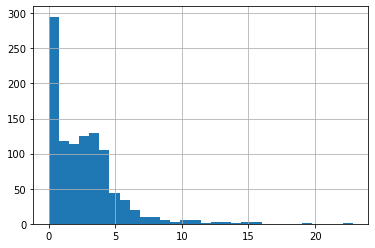

In [15]:
df_filtered["diff"].abs().hist(bins = 30)

In [16]:
df_filtered["displace"] = np.NAN

for quadrant in quadrante_numbers:
    print(quadrant)
    for fish_ident in fish_identification:
        print(fish_ident)
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        print(the_takes)
        for take_id in the_takes:
            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                if idx > 0:
                    
                               
                    the_value = df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'fish_head'].iloc[0]
                    previous_value = df_filtered.loc[(df_filtered.index==list_frames[idx-1]) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id) & (df_filtered.fish_id == fish_ident ), 'fish_head'].iloc[0]           
                                        
                    df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'displace'] = ((the_value[0] - previous_value[0])**2 \
                    + (the_value[1] - previous_value[1])**2)**0.5
                            
                    
      
        
       
                


    


    



3
1
[1 2]


In [17]:
df_filtered.head(10)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace
frame_number,,,,,,,,,,,,,,,
1307,12.000000,"(82, 49)","(54, 50)","(94, 49)",3,256.0,1,"[(49, 86), (50, 78), (50, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((94, 49), (50, 78))",3.576334,3.576334,NaN,NaN
1308,13.038405,"(82, 49)","(54, 50)","(95, 48)",3,256.0,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((95, 48), (49, 78))",3.366461,3.366461,-0.209874,1.414214
1309,13.038405,"(83, 48)","(54, 50)","(96, 47)",3,252.5,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((96, 47), (49, 78))",6.340192,6.340192,2.973731,1.414214
1310,12.000000,"(84, 48)","(57, 49)","(96, 48)",3,240.5,1,"[(48, 89), (49, 81), (49, 73), (48, 65), (49, ...","(0, 0, 416, 409)",1,"((96, 48), (49, 81))",3.814075,3.814075,-2.526117,1.000000
1311,12.041595,"(85, 48)","(57, 48)","(97, 47)",3,250.5,1,"[(48, 89), (49, 81), (48, 73), (48, 65), (48, ...","(0, 0, 416, 409)",1,"((97, 47), (49, 81))",7.125016,7.125016,3.310942,1.414214
1312,12.041595,"(86, 47)","(57, 48)","(98, 46)",3,254.0,1,"[(48, 89), (48, 81), (48, 73), (49, 65), (48, ...","(0, 0, 416, 409)",1,"((98, 46), (48, 81))",6.709837,6.709837,-0.415180,1.414214
1313,12.000000,"(87, 47)","(58, 50)","(99, 47)",3,249.5,1,"[(48, 90), (48, 82), (48, 74), (49, 66), (50, ...","(0, 0, 416, 409)",1,"((99, 47), (48, 82))",3.366461,3.366461,-3.343376,1.414214
1314,13.038405,"(87, 47)","(58, 50)","(100, 46)",3,257.0,1,"[(47, 94), (48, 85), (48, 76), (49, 67), (50, ...","(0, 0, 416, 409)",1,"((100, 46), (48, 85))",7.594643,7.594643,4.228183,1.414214
1315,11.000000,"(90, 47)","(65, 46)","(101, 47)",3,252.5,1,"[(47, 94), (48, 87), (47, 80), (47, 73), (46, ...","(0, 0, 416, 409)",1,"((101, 47), (48, 87))",4.085617,4.085617,-3.509027,1.414214


Calculate the predicted next position if fish would be swimming straight

<AxesSubplot:>

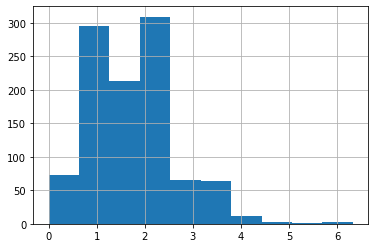

In [18]:
df_filtered["displace"].hist()

In [19]:
df_filtered

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace
frame_number,,,,,,,,,,,,,,,
1307,12.000000,"(82, 49)","(54, 50)","(94, 49)",3,256.0,1,"[(49, 86), (50, 78), (50, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((94, 49), (50, 78))",3.576334,3.576334,NaN,NaN
1308,13.038405,"(82, 49)","(54, 50)","(95, 48)",3,256.0,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((95, 48), (49, 78))",3.366461,3.366461,-0.209874,1.414214
1309,13.038405,"(83, 48)","(54, 50)","(96, 47)",3,252.5,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((96, 47), (49, 78))",6.340192,6.340192,2.973731,1.414214
1310,12.000000,"(84, 48)","(57, 49)","(96, 48)",3,240.5,1,"[(48, 89), (49, 81), (49, 73), (48, 65), (49, ...","(0, 0, 416, 409)",1,"((96, 48), (49, 81))",3.814075,3.814075,-2.526117,1.000000
1311,12.041595,"(85, 48)","(57, 48)","(97, 47)",3,250.5,1,"[(48, 89), (49, 81), (48, 73), (48, 65), (48, ...","(0, 0, 416, 409)",1,"((97, 47), (49, 81))",7.125016,7.125016,3.310942,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,13.453624,"(208, 397)","(227, 371)","(199, 407)",3,272.5,1,"[(402, 204), (395, 212), (387, 219), (379, 224...","(0, 0, 416, 409)",2,"((199, 407), (395, 212))",-137.290610,137.290610,4.581220,2.000000
2499,13.601471,"(207, 397)","(228, 376)","(196, 405)",3,268.5,1,"[(403, 200), (397, 208), (390, 216), (384, 224...","(0, 0, 416, 409)",2,"((196, 405), (397, 208))",-146.309932,146.309932,9.019322,3.605551
2500,12.041595,"(205, 398)","(226, 382)","(196, 406)",3,267.0,1,"[(402, 200), (397, 207), (392, 214), (387, 221...","(0, 0, 416, 409)",2,"((196, 406), (397, 207))",-140.710593,140.710593,-5.599339,1.000000


In [20]:
df_filtered["next_predicted"] = None
from sklearn.linear_model import LinearRegression

def reg(row):
    coord=row["angle"]
    distance = row["displace"]
    #print(type(distance))
    #print(coord)
    #print(distance)
    
    if not np.isnan(distance):
        print("calculate")
        x = np.array([coord[1][1], coord[0][0]]).reshape((-1, 1)) # need to invert as tail is y and x and  not xy
        y = np.array([coord[1][0], coord[0][1]])
        model_regression = LinearRegression()
        model_regression.fit(x, y)
        model_regression = LinearRegression().fit(x, y)
        
        #calculate the next x based on distance of body and head
        calc = coord[1][1] - coord[0][0]
        if calc > 0:
            calc_x = coord[0][0] - distance
        else:
            calc_x = coord[0][0] + distance
            
        
        x = np.array([calc_x]).reshape((-1, 1))
        y_pred = model_regression.predict(x)
        return (int(calc_x), int(y_pred[0]))
    else:
        return None

df_filtered["next_predicted"] = df_filtered.apply(reg, axis = 1)

calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate
calculate


In [21]:
df_filtered.head(100)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace,next_predicted
frame_number,,,,,,,,,,,,,,,,
1307,12.000000,"(82, 49)","(54, 50)","(94, 49)",3,256.0,1,"[(49, 86), (50, 78), (50, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((94, 49), (50, 78))",3.576334,3.576334,NaN,NaN,None
1308,13.038405,"(82, 49)","(54, 50)","(95, 48)",3,256.0,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((95, 48), (49, 78))",3.366461,3.366461,-0.209874,1.414214,"(96, 47)"
1309,13.038405,"(83, 48)","(54, 50)","(96, 47)",3,252.5,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((96, 47), (49, 78))",6.340192,6.340192,2.973731,1.414214,"(97, 46)"
1310,12.000000,"(84, 48)","(57, 49)","(96, 48)",3,240.5,1,"[(48, 89), (49, 81), (49, 73), (48, 65), (49, ...","(0, 0, 416, 409)",1,"((96, 48), (49, 81))",3.814075,3.814075,-2.526117,1.000000,"(97, 47)"
1311,12.041595,"(85, 48)","(57, 48)","(97, 47)",3,250.5,1,"[(48, 89), (49, 81), (48, 73), (48, 65), (48, ...","(0, 0, 416, 409)",1,"((97, 47), (49, 81))",7.125016,7.125016,3.310942,1.414214,"(98, 46)"
1312,12.041595,"(86, 47)","(57, 48)","(98, 46)",3,254.0,1,"[(48, 89), (48, 81), (48, 73), (49, 65), (48, ...","(0, 0, 416, 409)",1,"((98, 46), (48, 81))",6.709837,6.709837,-0.415180,1.414214,"(99, 45)"
1313,12.000000,"(87, 47)","(58, 50)","(99, 47)",3,249.5,1,"[(48, 90), (48, 82), (48, 74), (49, 66), (50, ...","(0, 0, 416, 409)",1,"((99, 47), (48, 82))",3.366461,3.366461,-3.343376,1.414214,"(100, 46)"
1314,13.038405,"(87, 47)","(58, 50)","(100, 46)",3,257.0,1,"[(47, 94), (48, 85), (48, 76), (49, 67), (50, ...","(0, 0, 416, 409)",1,"((100, 46), (48, 85))",7.594643,7.594643,4.228183,1.414214,"(101, 45)"
1315,11.000000,"(90, 47)","(65, 46)","(101, 47)",3,252.5,1,"[(47, 94), (48, 87), (47, 80), (47, 73), (46, ...","(0, 0, 416, 409)",1,"((101, 47), (48, 87))",4.085617,4.085617,-3.509027,1.414214,"(102, 46)"


In [22]:
df_filtered['diff_pred'] = np.NaN

for quadrant in quadrante_numbers:
    for fish_ident in fish_identification:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                if idx > 0:                   
                    print("will apply")                                                      
                    current_position = df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'angle'].iloc[0][0]
                    predicted_position = df_filtered.loc[(df_filtered.index==list_frames[idx-1]) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id) & (df_filtered.fish_id == fish_ident ), 'next_predicted'].iloc[0]           
                    if isinstance(predicted_position, tuple):
                        distance = ((current_position[0] - predicted_position[0])**2 + (current_position[1] - predicted_position[1])**2)**0.5
                        df_filtered.loc[(df_filtered.index==value) & (df_filtered.quadrant == quadrant) & (df_filtered["take"] == take_id ) & (df_filtered.fish_id == fish_ident ), 'diff_pred'] = distance
                                
                    
      
       

        
        




will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply
will apply

In [23]:
df_filtered['sequence'] = None
sequence_number = 1
for quadrant in quadrante_numbers:
    for fish_ident in fish_identification:
        the_takes = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident)]["take"].unique()
        for take_id in the_takes:
            #sequence_number = 1

            list_frames = df_filtered[(df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)].index.values
            #print(list_frames)
            for idx, value in enumerate(list_frames):
                
                the_fish = df_filtered[(df_filtered.index == value) & (df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id)]
                
                #print(the_fish)
               
                
                if  (the_fish['diff_pred'].iloc[0] < 3) and (the_fish['diff'].iloc[0] < 2)  and (the_fish['displace'].iloc[0] < 6.5):
                   #(the_fish['diff_pred'].iloc[0] < 50) and
                    df_filtered.loc[(df_filtered.index == value) & (df_filtered["quadrant"] == quadrant) & (df_filtered["fish_id"] == fish_ident) & (df_filtered["take"] == take_id), 'sequence'] = sequence_number 
                    #df_filtered.loc[df_filtered.index[idx], 'sequence'] = sequence_number
                else:
                   
                    sequence_number = sequence_number + 1









In [24]:
df_filtered.head(100)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,take,angle,rotation,abs_rotation,diff,displace,next_predicted,diff_pred,sequence
frame_number,,,,,,,,,,,,,,,,,,
1307,12.000000,"(82, 49)","(54, 50)","(94, 49)",3,256.0,1,"[(49, 86), (50, 78), (50, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((94, 49), (50, 78))",3.576334,3.576334,NaN,NaN,None,NaN,None
1308,13.038405,"(82, 49)","(54, 50)","(95, 48)",3,256.0,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((95, 48), (49, 78))",3.366461,3.366461,-0.209874,1.414214,"(96, 47)",NaN,None
1309,13.038405,"(83, 48)","(54, 50)","(96, 47)",3,252.5,1,"[(49, 86), (49, 78), (49, 70), (50, 62), (50, ...","(0, 0, 416, 409)",1,"((96, 47), (49, 78))",6.340192,6.340192,2.973731,1.414214,"(97, 46)",0.000000,None
1310,12.000000,"(84, 48)","(57, 49)","(96, 48)",3,240.5,1,"[(48, 89), (49, 81), (49, 73), (48, 65), (49, ...","(0, 0, 416, 409)",1,"((96, 48), (49, 81))",3.814075,3.814075,-2.526117,1.000000,"(97, 47)",2.236068,4
1311,12.041595,"(85, 48)","(57, 48)","(97, 47)",3,250.5,1,"[(48, 89), (49, 81), (48, 73), (48, 65), (48, ...","(0, 0, 416, 409)",1,"((97, 47), (49, 81))",7.125016,7.125016,3.310942,1.414214,"(98, 46)",0.000000,None
1312,12.041595,"(86, 47)","(57, 48)","(98, 46)",3,254.0,1,"[(48, 89), (48, 81), (48, 73), (49, 65), (48, ...","(0, 0, 416, 409)",1,"((98, 46), (48, 81))",6.709837,6.709837,-0.415180,1.414214,"(99, 45)",0.000000,5
1313,12.000000,"(87, 47)","(58, 50)","(99, 47)",3,249.5,1,"[(48, 90), (48, 82), (48, 74), (49, 66), (50, ...","(0, 0, 416, 409)",1,"((99, 47), (48, 82))",3.366461,3.366461,-3.343376,1.414214,"(100, 46)",2.000000,5
1314,13.038405,"(87, 47)","(58, 50)","(100, 46)",3,257.0,1,"[(47, 94), (48, 85), (48, 76), (49, 67), (50, ...","(0, 0, 416, 409)",1,"((100, 46), (48, 85))",7.594643,7.594643,4.228183,1.414214,"(101, 45)",0.000000,None
1315,11.000000,"(90, 47)","(65, 46)","(101, 47)",3,252.5,1,"[(47, 94), (48, 87), (47, 80), (47, 73), (46, ...","(0, 0, 416, 409)",1,"((101, 47), (48, 87))",4.085617,4.085617,-3.509027,1.414214,"(102, 46)",2.000000,6


<AxesSubplot:>

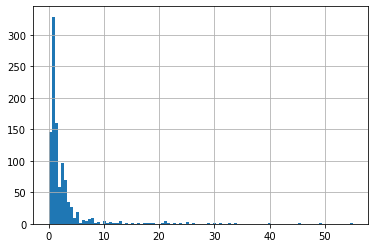

In [25]:
df_filtered["diff_pred"].hist(bins=100)

In [26]:
count_df = df_filtered.groupby('sequence')['sequence'].count()


In [27]:
filtered_count = count_df[count_df > 6]

In [28]:
filtered_count = filtered_count.index.tolist()

In [29]:
filtered_count = set(filtered_count)

In [30]:
final_df = df_filtered[df_filtered['sequence'].isin(filtered_count)]


In [31]:
final_df["coord_plus_seq"] = np.NaN
final_df["coord_plus_seq"] = final_df.apply(lambda x: x.fish_head + (int(x.sequence),) + ((x.tail_points),), axis = 1)


In [32]:
final_df = final_df[['length_of_fish', 'center_of_mass', 'fish_tail',
       'fish_head', 'quadrant', 'fish_area', 'fish_id', 'tail_points', 
       'quad_coord', 'sequence']]



In [33]:
final_df.to_csv('C:/Users/marcio/Documents/fish_analyzer_rotated' + '.csv', mode='w', index=True, header=True)


In [34]:
pd.set_option('display.max_rows', 1000000)

final_df.loc[final_df["quadrant"] == 0]


,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,tail_points,quad_coord,sequence
frame_number,,,,,,,,,,
